<a href="https://colab.research.google.com/github/iam7mza/EventClassification/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # Downloading the dataset from GitHub (uncomment when running on Colab)
# !git clone "https://github.com/iam7mza/EventClassification.git"
# !mv EventClassification/* ./
# !rm -rf EventClassification
# !rm -rf sample_data

#importing data

import loader
import numpy as np
import pandas as pd

filepath = "csv_output"
df = loader.load(filepath);
loader.clean(df); #to clean the data

df = df[df['numeric_target'] != -1]  #dropping all the unknown events

# Check unique event types and their corresponding targets
event_target_mapping = df[['event_type', 'numeric_target']].drop_duplicates().sort_values('numeric_target')
print("Event type to target mapping:")
print(event_target_mapping)

print(f'columns = {df.columns}')

Found 92 CSV files
Processing: csv_output/Wtaunu_PTV140_280_CVetoBVeto_sample1000.csv
  -> Added 1000 events (event name: Wtaunu_PTV140_280_CVetoBVeto)
Processing: csv_output/Wtaunu_PTV280_500_BFilter_sample1000.csv
  -> Added 1000 events (event name: Wtaunu_PTV280_500_BFilter)
Processing: csv_output/ZPrime1500_tt_sample1000.csv
  -> Added 1000 events (event name: ZPrime1500_tt)
Processing: csv_output/TT_directTT_500_200_sample1000.csv
  -> Added 1000 events (event name: TT_directTT_500_200)
Processing: csv_output/Zee_PTV1000_E_CMS_sample1000.csv
  -> Added 1000 events (event name: Zee_PTV1000_E_CMS)
Processing: csv_output/Zmumu_PTV140_280_CFilterBVeto_sample1000.csv
  -> Added 1000 events (event name: Zmumu_PTV140_280_CFilterBVeto)
Processing: csv_output/single_top_wtchan_sample1000.csv
  -> Added 1000 events (event name: single_top_wtchan)
Processing: csv_output/Zee_sample1000.csv
  -> Added 1000 events (event name: Zee)
Processing: csv_output/Ztautau_PTV1000_E_CMS_sample1000.csv
  -

In [2]:
# the chosen ones
TheChosenOnes = ['trigE', 'trigM', 'trigP', 'lep_n','lep_pt', 'lep_eta', 'lep_phi',
       'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID',
       'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased',
       'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt',
       'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt','jet_MV2c10', 'photon_n','photon_pt', 'photon_eta', 'photon_phi',
       'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20',
       'photon_convType', 'largeRjet_n', 'largeRjet_pt', 'largeRjet_eta',
       'largeRjet_phi', 'largeRjet_E', 'largeRjet_m','largeRjet_D2', 'largeRjet_tau32', 'tau_n', 'tau_pt', 'tau_eta',
       'tau_phi', 'tau_E', 'tau_charge', 'tau_isTightID', 'tau_nTracks', 'tau_BDTid', 'ditau_m', 'lep_pt_syst',
       'met_et_syst', 'jet_pt_syst', 'photon_pt_syst', 'largeRjet_pt_syst',
       'tau_pt_syst']


#df[TheChosenOnes]

#extracting the features for lists (only first two elements)

#TODO: Turn into a function and make the number of cols an arg
# Separate list and scalar columns

def extract_list_features(df, list_cols, scalar_cols, n_elements=2):
    """
    Extract features from list columns with configurable number of elements.

    Parameters:
    df: DataFrame containing the data
    list_cols: List of column names that contain lists
    scalar_cols: List of column names that contain scalar values
    n_elements: Number of elements to extract from each list (max 5)

    Returns:
    DataFrame with extracted features
    """
    # Ensure n_elements is within valid range
    n_elements = min(max(n_elements, 1), 5)

    # Element names for readability
    element_names = ['first', 'second', 'third', 'fourth', 'fifth']

    extracted_data = {}

    # Add scalar columns
    for col in scalar_cols:
        extracted_data[col] = df[col]

    # Add list-derived columns
    for col in list_cols:
        for i in range(n_elements):
            col_name = f'{col}_{element_names[i]}'
            extracted_data[col_name] = df[col].apply(
                lambda x: x[i] if len(x) > i else np.nan
            )

    return pd.DataFrame(extracted_data)

# Usage with configurable number of elements
n_elements = 5  # Change this to extract 1-5 elements from each list

# Separate list and scalar columns
list_cols = []
scalar_cols = []

for col in TheChosenOnes:
    if col in df.columns:
        if isinstance(df[col].iloc[0], list):  # Use iloc[0] instead of [0]
            list_cols.append(col)
        else:
            scalar_cols.append(col)

print(f"List columns: {len(list_cols)}")
print(f"Scalar columns: {len(scalar_cols)}")
print(f"Extracting {n_elements} elements from each list column")

# Extract features with specified number of elements
df_extracted = extract_list_features(df, list_cols, scalar_cols, n_elements)

print(f"Shape after feature extraction: {df_extracted.shape}")

# Drop columns that are all zeros or nan
columns_to_drop = []
for col in df_extracted.columns:
    if df_extracted[col].isna().all():  # nan check
        columns_to_drop.append(col)
        print(f"Column {col} is all NaN, will drop it.")
    elif (df_extracted[col] == 0).all():  # zero check
        columns_to_drop.append(col)
        print(f"Column {col} is all zeros, will drop it.")


# Drop all NaN columns at once
if columns_to_drop:
    df_extracted = df_extracted.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} NaN columns")

print(f"Final shape: {df_extracted.shape}")
df_extracted

List columns: 46
Scalar columns: 12
Extracting 5 elements from each list column
Shape after feature extraction: (80000, 242)
Column trigP is all zeros, will drop it.
Column photon_n is all zeros, will drop it.
Column tau_n is all zeros, will drop it.
Column ditau_m is all zeros, will drop it.
Column lep_pt_fifth is all NaN, will drop it.
Column lep_eta_fifth is all NaN, will drop it.
Column lep_phi_fifth is all NaN, will drop it.
Column lep_E_fifth is all NaN, will drop it.
Column lep_z0_fifth is all NaN, will drop it.
Column lep_charge_fifth is all NaN, will drop it.
Column lep_type_fifth is all NaN, will drop it.
Column lep_isTightID_fifth is all NaN, will drop it.
Column lep_ptcone30_fifth is all NaN, will drop it.
Column lep_etcone20_fifth is all NaN, will drop it.
Column lep_trackd0pvunbiased_fifth is all NaN, will drop it.
Column lep_tracksigd0pvunbiased_fifth is all NaN, will drop it.
Column photon_pt_first is all zeros, will drop it.
Column photon_pt_second is all zeros, will d

trigE  trigM  lep_n     met_et   met_phi  jet_n  largeRjet_n  \
0          1      0      1   24384.90  2.320400      2            1   
1          0      1      1  237930.00 -2.133460      1            1   
2          1      0      1  208198.00 -1.976610      2            1   
3          0      1      1  230894.00 -1.423400      1            1   
4          0      1      1  211760.00  2.470310      1            1   
...      ...    ...    ...        ...       ...    ...          ...   
91995      0      1      2    9092.94  1.245910      6            2   
91996      0      1      2   69305.20  1.151870      3            2   
91997      0      1      2   67272.80 -2.494600      6            2   
91998      0      1      2  111414.00  1.580380      6            1   
91999      0      1      2   56998.40  0.626345      2            1   

       met_et_syst  lep_pt_first  lep_pt_second  ...  jet_pt_syst_first  \
0          2242.69      245321.0            0.0  ...            6109.66   
1         15707.70       39355.7            0.0  ...           16131.40   
2         11325.70       68014.3            0.0  ...           15391.80   
3         25899.90       51327.8            0.0  ...           10388.50   
4         12714.40       40109.7            0.0  ...           13011.80   
...            ...           ...            ...  ...                ...   
91995      3593.22       63538.7        50036.1  ...           33532.00   
91996     20409.20      118758.0        14310.4  ...           11283.50   
91997      8455.48      131488.0        39330.6  ...           13547.10   
91998     23149.70      689621.0        70019.6  ...           15452.20   
91999     25161.30      819798.0       159566.0  ...           29539.50   

       jet_pt_syst_second  jet_pt_syst_third  jet_pt_syst_fourth  \
0                 2291.37                NaN                 NaN   
1                    0.00                NaN                 NaN   
2                 3237.42                NaN                 NaN   
3                    0.00                NaN                 NaN   
4                    0.00                NaN                 NaN   
...                   ...                ...                 ...   
91995            10111.30            7996.89             2479.86   
91996             7193.64            5097.09                 NaN   
91997            23470.60            3219.74             5997.92   
91998            11654.70           12698.30             8118.28   
91999             2108.78                NaN                 NaN   

       jet_pt_syst_fifth  largeRjet_pt_syst_first  largeRjet_pt_syst_second  \
0                    NaN                 8803.120                      0.00   
1                    NaN                    0.000                      0.00   
2                    NaN                  473.531                      0.00   
3                    NaN                 6789.250                      0.00   
4                    NaN                 1539.520                      0.00   
...                  ...                      ...                       ...   
91995            1626.69                14038.000                   9563.00   
91996                NaN                17600.600                   4570.03   
91997            2565.02                49906.100                  21434.00   
91998            6397.66                71688.600                      0.00   
91999                NaN                23536.700                      0.00   

       largeRjet_pt_syst_third  largeRjet_pt_syst_fourth  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   
...                        ...                       ...   
91995                      NaN                       NaN   
91996  

In [3]:
df['lep_pt']

0               [245321, 0]
1              [39355.7, 0]
2              [68014.3, 0]
3              [51327.8, 0]
4              [40109.7, 0]
                ...        
91995    [63538.7, 50036.1]
91996     [118758, 14310.4]
91997     [131488, 39330.6]
91998     [689621, 70019.6]
91999      [819798, 159566]
Name: lep_pt, Length: 80000, dtype: object

In [4]:
df_extracted.isna()

trigE  trigM  lep_n  met_et  met_phi  jet_n  largeRjet_n  met_et_syst  \
0      False  False  False   False    False  False        False        False   
1      False  False  False   False    False  False        False        False   
2      False  False  False   False    False  False        False        False   
3      False  False  False   False    False  False        False        False   
4      False  False  False   False    False  False        False        False   
...      ...    ...    ...     ...      ...    ...          ...          ...   
91995  False  False  False   False    False  False        False        False   
91996  False  False  False   False    False  False        False        False   
91997  False  False  False   False    False  False        False        False   
91998  False  False  False   False    False  False        False        False   
91999  False  False  False   False    False  False        False        False   

       lep_pt_first  lep_pt_second  ...  jet_pt_syst_first  \
0             False          False  ...              False   
1             False          False  ...              False   
2             False          False  ...              False   
3             False          False  ...              False   
4             False          False  ...              False   
...             ...            ...  ...                ...   
91995         False          False  ...              False   
91996         False          False  ...              False   
91997         False          False  ...              False   
91998         False          False  ...              False   
91999         False          False  ...              False   

       jet_pt_syst_second  jet_pt_syst_third  jet_pt_syst_fourth  \
0                   False               True                True   
1                   False               True                True   
2                   False               True                True   
3                   False               True                True   
4                   False               True                True   
...                   ...                ...                 ...   
91995               False              False               False   
91996               False              False                True   
91997               False              False               False   
91998               False              False               False   
91999               False               True                True   

       jet_pt_syst_fifth  largeRjet_pt_syst_first  largeRjet_pt_syst_second  \
0                   True                    False                     False   
1                   True                    False                     False   
2                   True                    False                     False   
3                   True                    False                     False   
4                   True                    False                     False   
...                  ...                      ...                       ...   
91995              False                    False                     False   
91996               True                    False                     False   
91997              False                    False                     False   
91998              False                    False                     False   
91999               True                    False                     False   

       largeRjet_pt_syst_third  largeRjet_pt_syst_fourth  \
0                         True                      True   
1                         True                      True   
2                         True                      True   
3                         True                      True   
4                         True                      True   
...                        ...                       ...   
91995                     True                      True   
91996                     True                      Tru

TODO: MCWEIGHT, DROPOUT AND DONT FORGET TO HAVE FUN

In [5]:
# First, let's see what columns with _first we have
first_cols = [col for col in df_extracted.columns if '_first' in col]
print("Columns with '_first':")
print(first_cols)

# Features to compute TOTAL (sum)
total_base_features = ['lep_pt', 'lep_E', 'lep_charge', 'lep_ptcone30', 'lep_etcone20',
                      'jet_pt', 'jet_E', 'largeRjet_pt', 'largeRjet_E', 'largeRjet_m']

# Features to compute MEAN (average)
mean_base_features = ['lep_eta', 'lep_phi', 'lep_z0', 'jet_eta', 'jet_phi',
                     'largeRjet_eta', 'largeRjet_phi', 'lep_pt_syst', 'jet_pt_syst',
                     'largeRjet_pt_syst']

element_indicators = ['_first', '_second', '_third', '_fourth', '_fifth']

print("\nCreating TOTAL columns:")
# Create total columns
for base_feature in total_base_features:
    feature_cols = []
    for indicator in element_indicators:
        col_name = f'{base_feature}{indicator}'
        if col_name in df_extracted.columns:
            feature_cols.append(col_name)

    if len(feature_cols) > 0:
        total_col_name = f'{base_feature}_total'
        df_extracted[total_col_name] = df_extracted[feature_cols].sum(axis=1)
        print(f"  {total_col_name} from {len(feature_cols)} columns: {feature_cols}")

print("\nCreating MEAN columns:")
# Create mean columns
for base_feature in mean_base_features:
    feature_cols = []
    for indicator in element_indicators:
        col_name = f'{base_feature}{indicator}'
        if col_name in df_extracted.columns:
            feature_cols.append(col_name)

    if len(feature_cols) > 0:
        mean_col_name = f'{base_feature}_mean'
        # Calculate mean excluding zeros to avoid bias from missing particles

        ##TODO: Im not sure if replacing 0 with NaN is the best way to calculate mean here
        df_extracted[mean_col_name] = df_extracted[feature_cols].replace(0, np.nan).mean(axis=1, skipna=True).fillna(0)
        print(f"  {mean_col_name} from {len(feature_cols)} columns: {feature_cols}")

print(f"\nShape after adding totals and means: {df_extracted.shape}")

# Show new columns created
new_total_cols = [col for col in df_extracted.columns if '_total' in col]
new_mean_cols = [col for col in df_extracted.columns if '_mean' in col]
print(f"Added {len(new_total_cols)} total columns and {len(new_mean_cols)} mean columns")
print(f"Total columns: {new_total_cols}")
print(f"Mean columns: {new_mean_cols}")


Columns with '_first':
['lep_pt_first', 'lep_eta_first', 'lep_phi_first', 'lep_E_first', 'lep_z0_first', 'lep_charge_first', 'lep_type_first', 'lep_isTightID_first', 'lep_ptcone30_first', 'lep_etcone20_first', 'lep_trackd0pvunbiased_first', 'lep_tracksigd0pvunbiased_first', 'jet_pt_first', 'jet_eta_first', 'jet_phi_first', 'jet_E_first', 'jet_jvt_first', 'jet_MV2c10_first', 'largeRjet_pt_first', 'largeRjet_eta_first', 'largeRjet_phi_first', 'largeRjet_E_first', 'largeRjet_m_first', 'largeRjet_D2_first', 'largeRjet_tau32_first', 'lep_pt_syst_first', 'jet_pt_syst_first', 'largeRjet_pt_syst_first']

Creating TOTAL columns:
  lep_pt_total from 4 columns: ['lep_pt_first', 'lep_pt_second', 'lep_pt_third', 'lep_pt_fourth']
  lep_E_total from 4 columns: ['lep_E_first', 'lep_E_second', 'lep_E_third', 'lep_E_fourth']
  lep_charge_total from 4 columns: ['lep_charge_first', 'lep_charge_second', 'lep_charge_third', 'lep_charge_fourth']
  lep_ptcone30_total from 4 columns: ['lep_ptcone30_first', 'le

##**Feature Selection**

In [6]:
#TODO: create cols with total values (for pt, E, et, etc.) such that when some cols are dropped, the total still exists

percentlim = 0.1  # 10% limit
nan_fraction = df_extracted.isna().mean(axis=0)  # Fraction of NaN values per column
high_nan_cols = nan_fraction[nan_fraction > percentlim].index.tolist()
print(f'{len(high_nan_cols)} cols are more than {percentlim*100:.0f}% NaN out of {len(df_extracted.columns)}')
print("NaN fractions per column:")
for col, frac in zip(df_extracted.columns, nan_fraction):
    if frac > 0:  # Only show columns with some NaN values
        print(f"  {col}: {frac*100:.1f}%")

df_extracted = df_extracted.drop(high_nan_cols, axis=1)
print(f'Columns remaining after dropping high-NaN columns: {len(df_extracted.columns)}')

df_extracted

71 cols are more than 10% NaN out of 155
NaN fractions per column:
  lep_pt_third: 97.4%
  lep_pt_fourth: 100.0%
  lep_eta_third: 97.4%
  lep_eta_fourth: 100.0%
  lep_phi_third: 97.4%
  lep_phi_fourth: 100.0%
  lep_E_third: 97.4%
  lep_E_fourth: 100.0%
  lep_z0_third: 97.4%
  lep_z0_fourth: 100.0%
  lep_charge_third: 97.4%
  lep_charge_fourth: 100.0%
  lep_type_third: 97.4%
  lep_type_fourth: 100.0%
  lep_isTightID_third: 97.4%
  lep_isTightID_fourth: 100.0%
  lep_ptcone30_third: 97.4%
  lep_ptcone30_fourth: 100.0%
  lep_etcone20_third: 97.4%
  lep_etcone20_fourth: 100.0%
  lep_trackd0pvunbiased_third: 97.4%
  lep_trackd0pvunbiased_fourth: 100.0%
  lep_tracksigd0pvunbiased_third: 97.4%
  lep_tracksigd0pvunbiased_fourth: 100.0%
  jet_pt_third: 41.1%
  jet_pt_fourth: 61.1%
  jet_pt_fifth: 75.5%
  jet_eta_third: 41.1%
  jet_eta_fourth: 61.1%
  jet_eta_fifth: 75.5%
  jet_phi_third: 41.1%
  jet_phi_fourth: 61.1%
  jet_phi_fifth: 75.5%
  jet_E_third: 41.1%
  jet_E_fourth: 61.1%
  jet_E_fifth

trigE  trigM  lep_n     met_et   met_phi  jet_n  largeRjet_n  \
0          1      0      1   24384.90  2.320400      2            1   
1          0      1      1  237930.00 -2.133460      1            1   
2          1      0      1  208198.00 -1.976610      2            1   
3          0      1      1  230894.00 -1.423400      1            1   
4          0      1      1  211760.00  2.470310      1            1   
...      ...    ...    ...        ...       ...    ...          ...   
91995      0      1      2    9092.94  1.245910      6            2   
91996      0      1      2   69305.20  1.151870      3            2   
91997      0      1      2   67272.80 -2.494600      6            2   
91998      0      1      2  111414.00  1.580380      6            1   
91999      0      1      2   56998.40  0.626345      2            1   

       met_et_syst  lep_pt_first  lep_pt_second  ...  lep_eta_mean  \
0          2242.69      245321.0            0.0  ...      1.094570   
1         15707.70       39355.7            0.0  ...      1.942800   
2         11325.70       68014.3            0.0  ...      1.709110   
3         25899.90       51327.8            0.0  ...      0.488266   
4         12714.40       40109.7            0.0  ...      1.945180   
...            ...           ...            ...  ...           ...   
91995      3593.22       63538.7        50036.1  ...     -1.969555   
91996     20409.20      118758.0        14310.4  ...     -0.068375   
91997      8455.48      131488.0        39330.6  ...     -0.302947   
91998     23149.70      689621.0        70019.6  ...      0.525356   
91999     25161.30      819798.0       159566.0  ...      0.117600   

       lep_phi_mean  lep_z0_mean  jet_eta_mean  jet_phi_mean  \
0          1.440310     0.051762      0.195189     -1.976090   
1         -2.159680    -0.031816      1.191030      1.035810   
2         -1.630620     0.055945      0.067170      0.848954   
3         -1.239890    -0.036573      0.975995      1.757060   
4          2.495610    -0.052513      0.426205     -0.641631   
...             ...          ...           ...           ...   
91995      0.636180     0.011535     -0.921390     -0.100585   
91996     -0.377752     0.023547     -0.127803      0.426242   
91997      2.605710     0.027370     -1.004852     -0.522050   
91998      2.070670     0.031548     -0.824590      0.397442   
91999      0.560494    -0.053066     -1.358345     -1.797525   

       largeRjet_eta_mean  largeRjet_phi_mean  lep_pt_syst_mean  \
0                1.119150            1.437520        2731.65000   
1                1.198880            1.035170         293.54300   
2                1.385870            1.345050         755.15300   
3                0.982887            1.759800         538.19300   
4                0.408605           -0.637559         173.56200   
...                   ...                 ...               ...   
91995           -0.876932           -0.609320         370.45000   
91996           -0.083679           -0.689808        3341.07750   
91997           -0.990711           -0.741261         865.97185   
91998           -0.561910           -1.387220       34501.89350   
91999           -0.487754           -2.568360       13302.94000   

       jet_pt_syst_mean  largeRjet_pt_syst_mean  
0           4200.515000                8803.120  
1          16131.400000                   0.000  
2           9314.610000                 473.531  
3          10388.500000                6789.250  
4          13011.800000                1539.520  
...                 ...                     ...  
91995      11149.348000               11800.500  
91996       7858.076667               11085.315  
91997       9760.076000               35670.050  
91998      10864.228000               71688.600  
91999      15824.140000               23536.700  

[80000 rows x 84 columns]

In [7]:
#Dropping nan rows (if they exist)

nan_counts = df_extracted.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]
print(f"Columns with NaN values ({len(columns_with_nan)} out of {len(nan_counts)}):")
if len(columns_with_nan) > 0:
    for col, count in columns_with_nan.items():
        print(f"  {col}: {count}")
else:
    print("No columns have NaN values! YIPPIEEE!!")

# FIXED: Drop the same rows from both features AND targets
print(f"Shape before dropping NaN rows: {df_extracted.shape}")
rows_before = len(df_extracted)

# Get mask for rows WITHOUT any NaN values
valid_rows_mask = ~df_extracted.isna().any(axis=1)

# Apply the same mask to BOTH dataframes
df_extracted = df_extracted[valid_rows_mask]
df = df[valid_rows_mask]  # Drop same rows from targets!

rows_after = len(df_extracted)
print(f"Shape after dropping NaN rows: {df_extracted.shape}")
print(f"Dropped {rows_before - rows_after} rows with NaN values")
print(f"Target dataframe shape: {df.shape}")

# Verify alignment
print(f"Features and targets are aligned: {len(df_extracted) == len(df)}")

Columns with NaN values (0 out of 84):
No columns have NaN values! YIPPIEEE!!
Shape before dropping NaN rows: (80000, 84)
Shape after dropping NaN rows: (80000, 84)
Dropped 0 rows with NaN values
Target dataframe shape: (80000, 86)
Features and targets are aligned: True


## **Plotting the features**

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dataframe_histograms(df, title="Feature Histograms", figsize=(20, 5),
                             cols_per_row=4, bins=50, show_stats=True,
                             save_path=None):
    """
    Create histograms for all columns in a DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame to plot
    title : str
        Main title for the plots
    figsize : tuple
        Base figure size (width, height per row)
    cols_per_row : int
        Number of columns per row in subplot grid
    bins : int
        Number of bins for histograms
    show_stats : bool
        Whether to show mean and std on each plot
    save_path : str, optional
        If provided, save the plot to this path

    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object
    """

    # Calculate subplot grid dimensions
    n_features = len(df.columns)
    n_rows = (n_features + cols_per_row - 1) // cols_per_row  # Round up
    n_subplot_cols = min(cols_per_row, n_features)

    # Create figure
    fig, axes = plt.subplots(n_rows, n_subplot_cols,
                            figsize=(figsize[0], figsize[1] * n_rows))
    fig.suptitle(title, fontsize=16, y=0.98)

    # Handle different axes configurations
    if n_rows > 1:
        axes = axes.flatten()
    elif n_rows == 1 and n_subplot_cols > 1:
        axes = axes
    else:
        axes = [axes]

    # Plot histogram for each column
    for i, col in enumerate(df.columns):
        if i < len(axes):
            ax = axes[i]

            # Get data and clean it
            data = df[col].replace([np.inf, -np.inf], np.nan).dropna()

            # Skip if no valid data
            if len(data) == 0:
                ax.text(0.5, 0.5, 'No valid data', transform=ax.transAxes,
                       ha='center', va='center', fontsize=12)
                ax.set_title(f'{col}', fontsize=10)
                continue

            # Create histogram
            ax.hist(data, bins=bins, alpha=0.8, color='steelblue',
                   edgecolor='black', linewidth=0.5)
            ax.set_title(f'{col}', fontsize=10)
            ax.set_xlabel('Value', fontsize=8)
            ax.set_ylabel('Frequency', fontsize=8)
            ax.grid(True, alpha=0.3)

            # Add statistics if requested
            if show_stats:
                stats_text = f'Count: {len(data)}\nMean: {data.mean():.3f}\nStd: {data.std():.3f}'
                ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                       verticalalignment='top', fontsize=8,
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Hide unused subplots
    for i in range(len(df.columns), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {save_path}")

    plt.show()

    # Print summary
    print(f"Created histograms for {len(df.columns)} features")
    print(f"Data shape: {df.shape}")


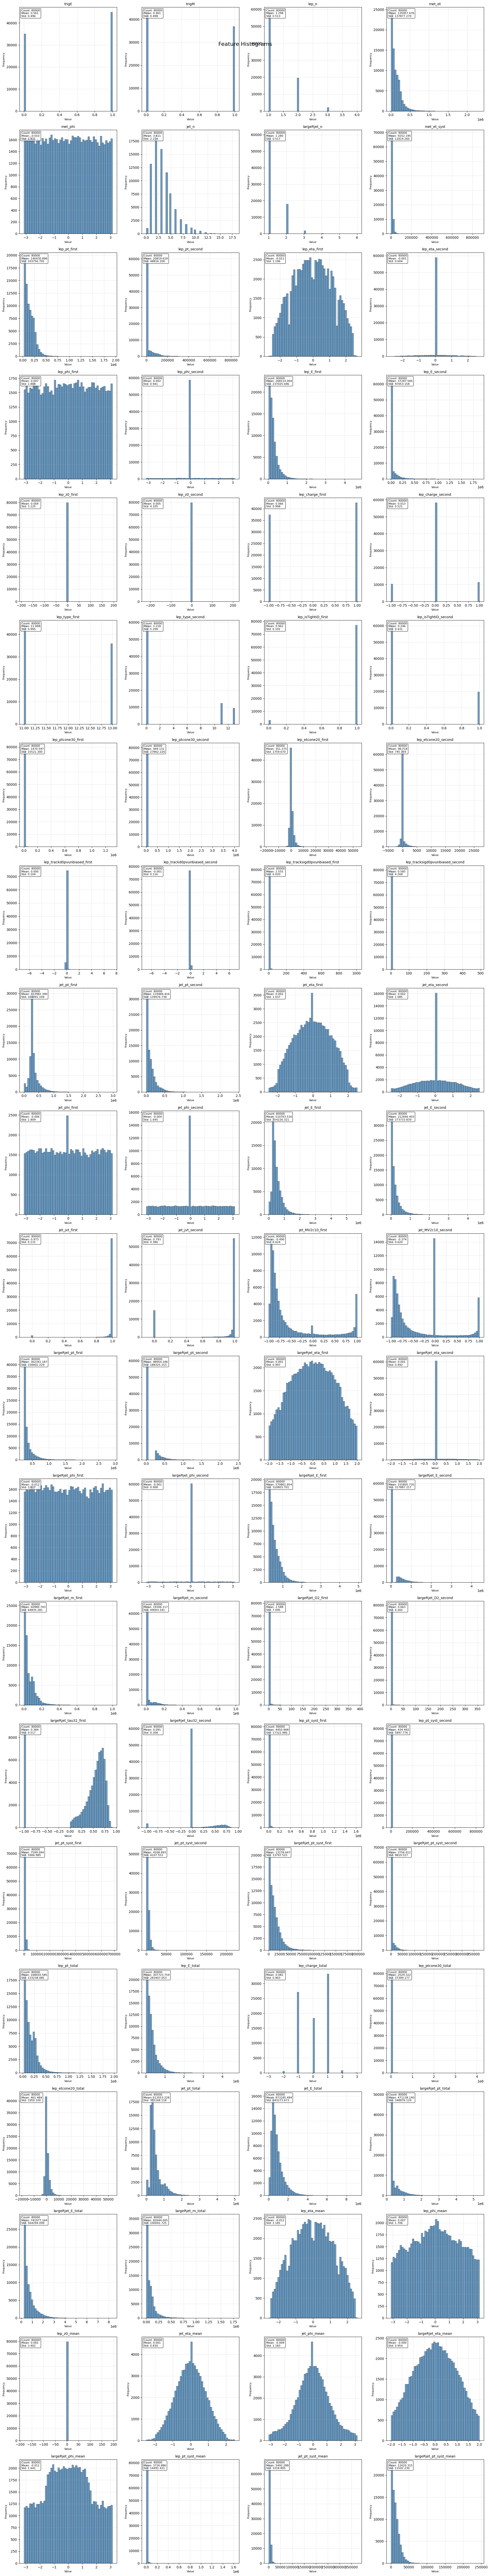

Created histograms for 84 features
Data shape: (80000, 84)


In [9]:
plot_dataframe_histograms(df_extracted)

# what is lep_z0?
# what is lep_trackd0pvunbiased?
# what is lep_tracksigd0pvunbiased?
# whats jet_jvt?

#why does lep_type look weird?



## **Trying different scalings**

In [23]:
# Apply log transformation to positive-only features that need it !!!!!!!!!!!!!!!!!!!!!!!!!!!!
from sklearn.preprocessing import PowerTransformer

# For right-skewed physics variables (pt, energy, etc.)

# features that need to be log scaled:
# met_et, met_et_syst, all lep_pt, all jet_pt, all lep_E, lep_etcone20 (mayble),
#  all jet_E, all largeRjet_pt, all largeRjet_E, all largeRjet_m, all lep_pt_syst,
#  alljet_pt_syst, all largeRjet_pt_syst

# Even safer approach - only transform positive-skewed variables
physics_vars = [col for col in df_extracted.columns if any(x in col.lower() for x in ['_pt', '_e_', '_etcone', '_m', 'met_et'])]

df_preprocessed = df_extracted.copy()

for col in physics_vars:
    if col in df_preprocessed.columns:
        # Only apply log transform if:
        # 1. All values are non-negative OR
        # 2. We can safely shift them
        
        data = df_preprocessed[col]
        
        if data.min() >= 0:
            # Safe to apply log1p directly
            df_preprocessed[col] = np.log1p(data)
        elif data.min() >= -1:
            # Values between -1 and 0, log1p might still work
            # But let's be extra safe
            df_preprocessed[col] = np.log1p(np.maximum(data, 0))  # Clip negatives to 0
        else:
            # Values < -1, need to shift
            shift = abs(data.min()) + 1e-6
            df_preprocessed[col] = np.log1p(data + shift)
        
        print(f"Transformed {col}: {df_preprocessed[col].isna().sum()} NaNs")

X = df_preprocessed

Transformed met_et: 0 NaNs
Transformed met_et_syst: 0 NaNs
Transformed lep_pt_first: 0 NaNs
Transformed lep_pt_second: 0 NaNs
Transformed lep_E_first: 0 NaNs
Transformed lep_E_second: 0 NaNs
Transformed lep_ptcone30_first: 0 NaNs
Transformed lep_ptcone30_second: 0 NaNs
Transformed lep_etcone20_first: 0 NaNs
Transformed lep_etcone20_second: 0 NaNs
Transformed jet_pt_first: 0 NaNs
Transformed jet_pt_second: 0 NaNs
Transformed jet_E_first: 0 NaNs
Transformed jet_E_second: 0 NaNs
Transformed jet_MV2c10_first: 0 NaNs
Transformed jet_MV2c10_second: 0 NaNs
Transformed largeRjet_pt_first: 0 NaNs
Transformed largeRjet_pt_second: 0 NaNs
Transformed largeRjet_E_first: 0 NaNs
Transformed largeRjet_E_second: 0 NaNs
Transformed largeRjet_m_first: 0 NaNs
Transformed largeRjet_m_second: 0 NaNs
Transformed lep_pt_syst_first: 0 NaNs
Transformed lep_pt_syst_second: 0 NaNs
Transformed jet_pt_syst_first: 0 NaNs
Transformed jet_pt_syst_second: 0 NaNs
Transformed largeRjet_pt_syst_first: 0 NaNs
Transformed l

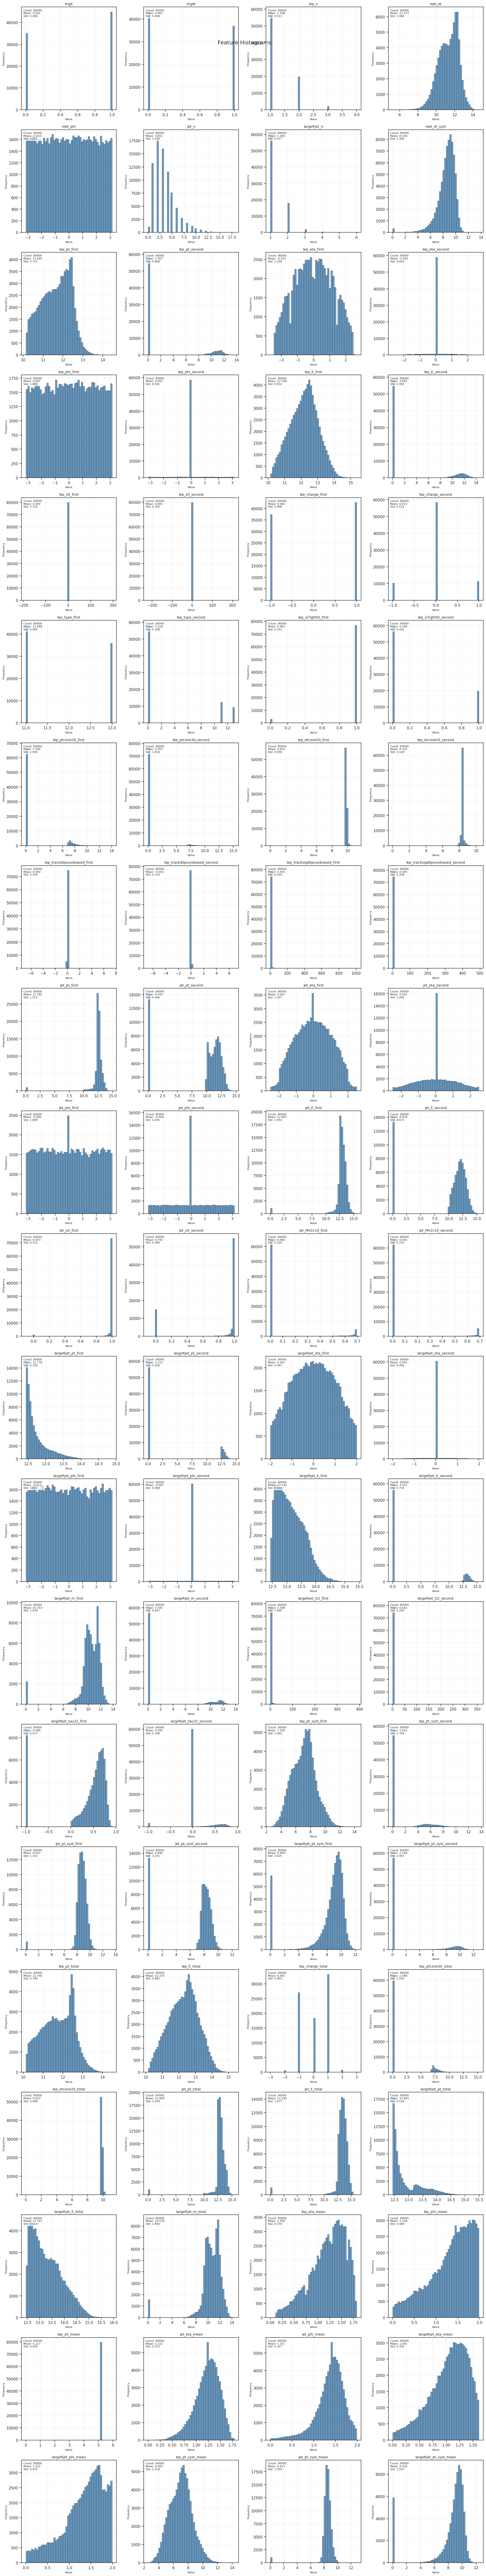

Created histograms for 84 features
Data shape: (80000, 84)


In [24]:
plot_dataframe_histograms(X)

#TODO: log transform the remaning freatures that might need it ex: largeRjet_D2 and other stuff

In [12]:
#TODO: figure out a way to limit the effect of outliers (the 0s)

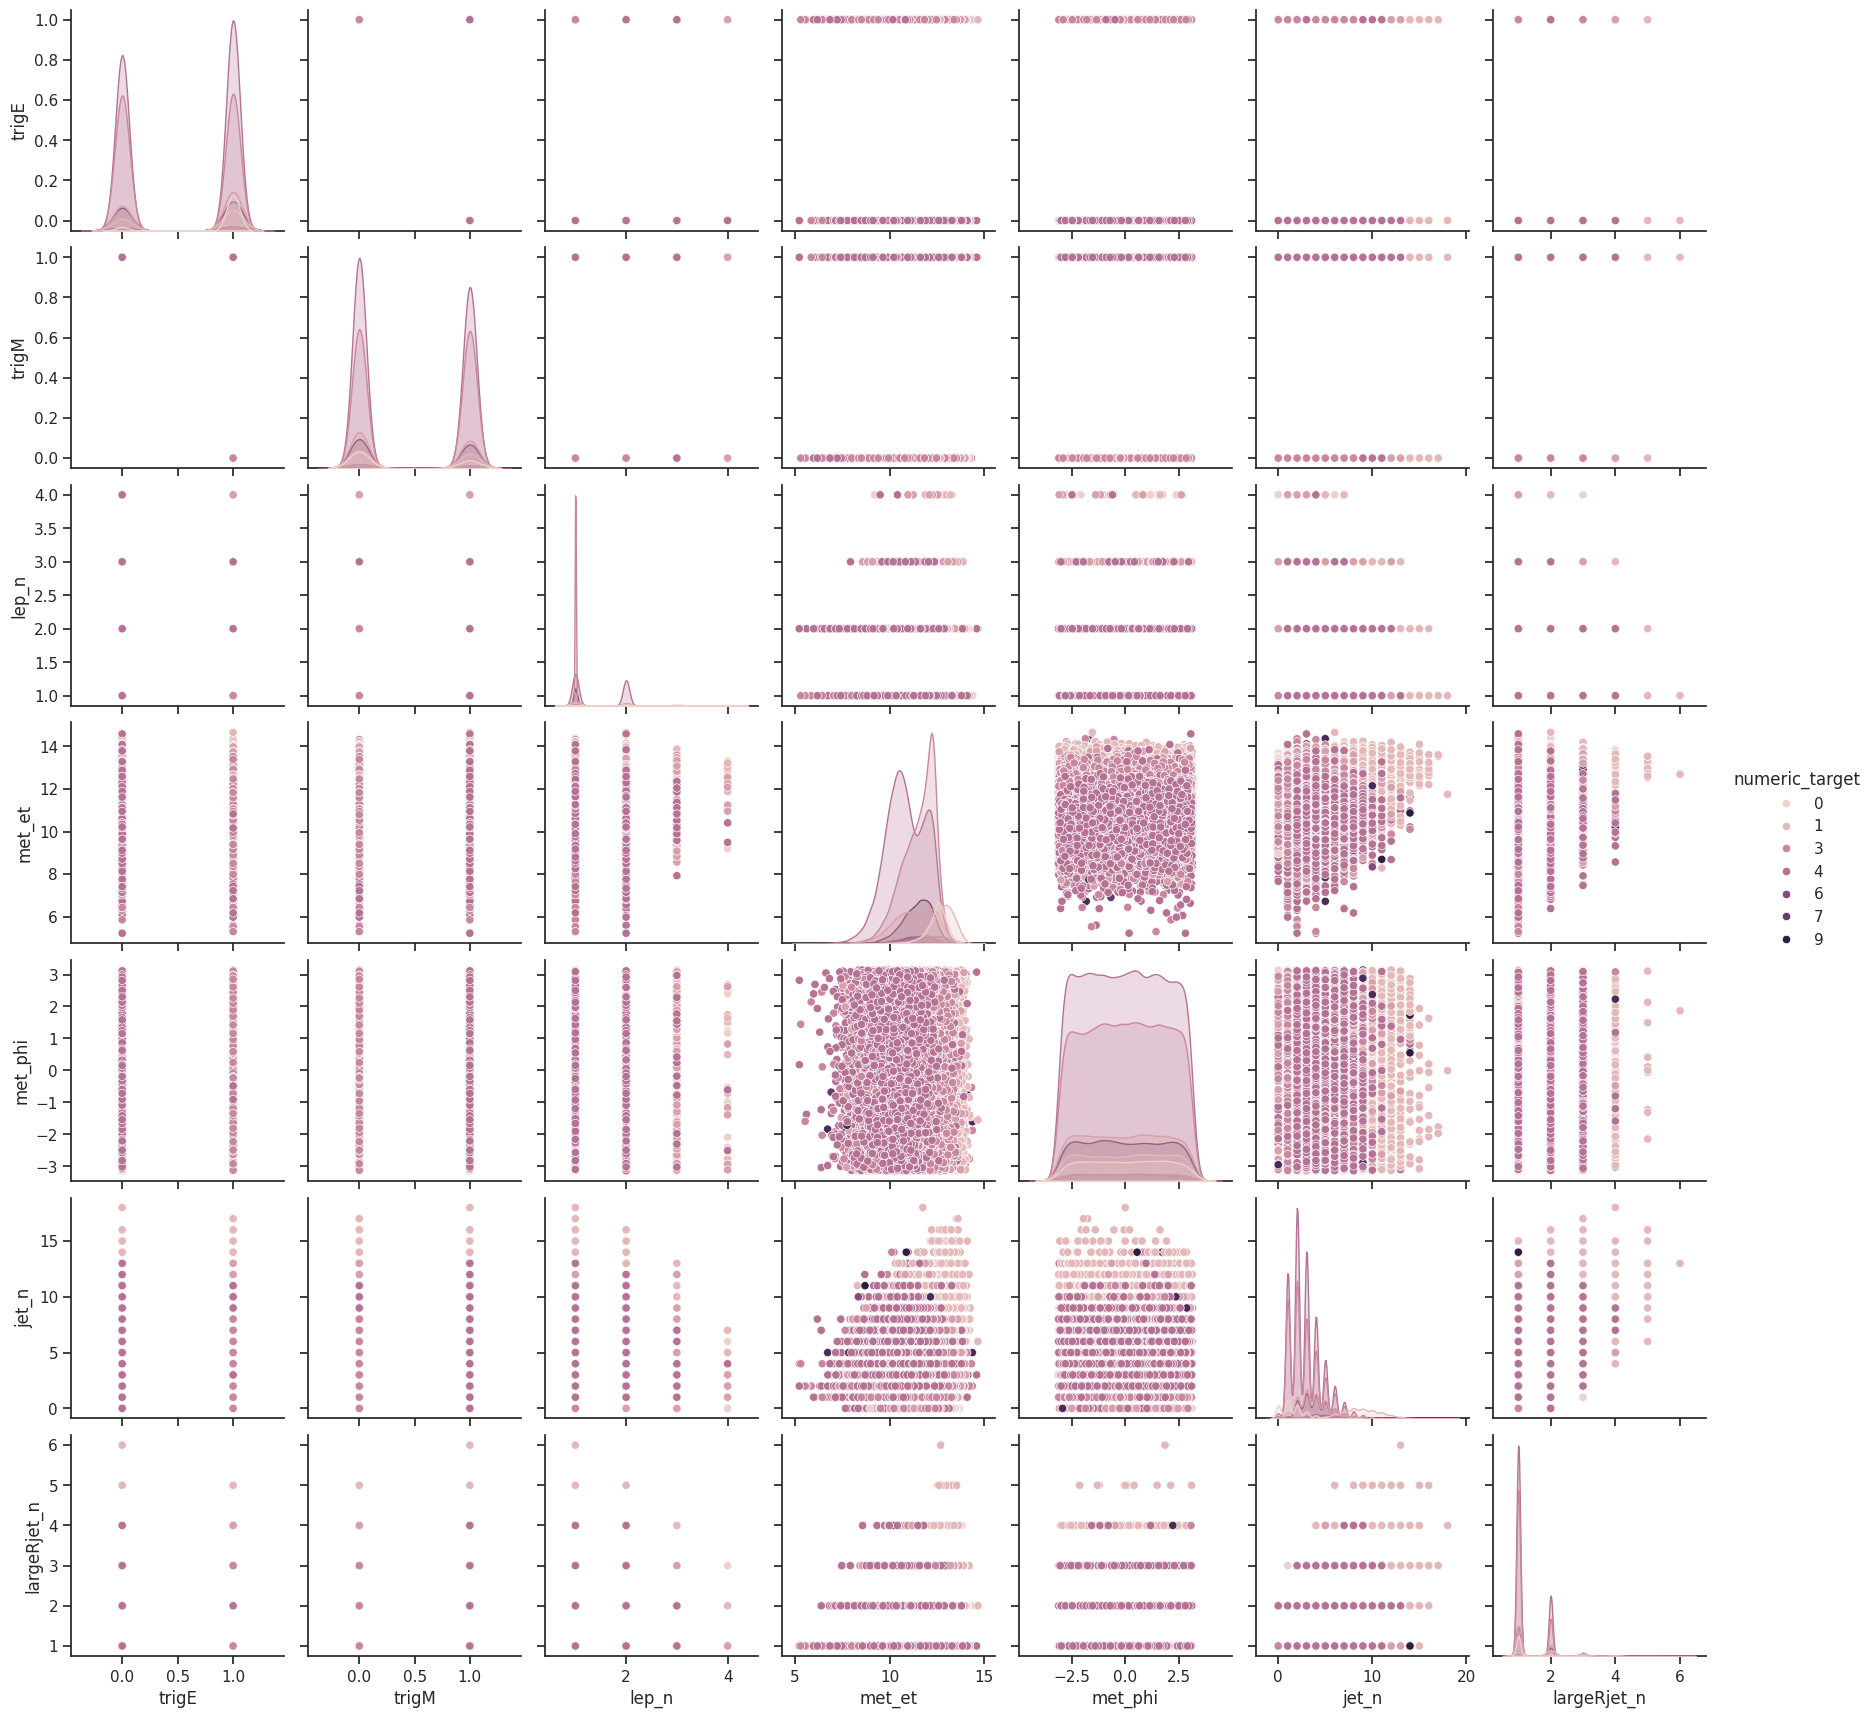

In [ ]:
# import seaborn as sns
# # Option 1: Create a combined DataFrame
# combined_df = X.iloc[:, :7].copy()
# combined_df['numeric_target'] = df['numeric_target'].values  # Use .values to avoid index mismatch

# sns.set_theme(style="ticks")
# sns.pairplot(combined_df,hue='numeric_target')
# plt.show()

In [25]:
# combined_df = df_extracted.iloc[:, :7].copy()
# combined_df['numeric_target'] = df['numeric_target'].values  # Use .values to avoid index mismatch

# sns.set_theme(style="ticks")
# sns.pairplot(combined_df,hue='numeric_target')
# plt.show()

In [26]:
print(np.sum(df_extracted.isna().sum() != 0))
print(np.sum(X.isna().sum() != 0))

0
0


In [32]:
y = df['numeric_target'].values
y

array([3, 3, 3, ..., 4, 4, 4], shape=(80000,))

## *Training begins here*

(array([63200.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   800.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

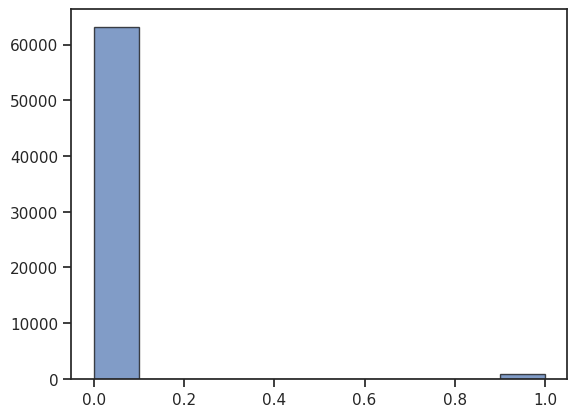

In [ ]:
# plan: train seaprtae models for each event type, then combine them into a single model

# train run, ttbar events

maskttbar = (y == 9)
yttbar = [1 if maskttbar[i] else 0 for i in range(len(y))]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, yttbar, test_size=0.2, random_state=123, stratify=yttbar)


plt.hist(y_train, edgecolor='black', alpha=0.7, )

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

# Convert DataFrame to NumPy arrays - THIS IS THE FIX!
X_train_array = X_train.values  # Convert DataFrame to NumPy array
X_test_array = X_test.values    # Convert DataFrame to NumPy array
y_train_array = np.array(y_train)  # Convert list to NumPy array
y_test_array = np.array(y_test)    # Convert list to NumPy array

print(f"X_train type: {type(X_train_array)}")
print(f"y_train type: {type(y_train_array)}")
print(f"X_train shape: {X_train_array.shape}")
print(f"y_train shape: {y_train_array.shape}")


#scaling the data

# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# # test different scaling methods
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train_array)
# X_test_scaled = scaler.transform(X_test_array)


#NOTE: standard scaling made the model worse 

#SCALING FUCKS EVERYTHING UP, DONT USE IT
# NOTE: AUC score always better without scaling!!!!!!!!!!!!!!!!

# Calculate class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_array), 
    y=y_train_array
)


# Weighting classes to handle imbalance
mild_class_weights = {
    0: 1.0,  # Normal weight for majority class
    1: 2.0  # Adjust later. Maybe useless bc we use SMOTE already
}

print(f"Class distribution: {np.bincount(y_train_array)}")
print(f"Class weights: {mild_class_weights}")


# using smote to balance the dataset
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=123, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_array, y_train_array)

print(f"Original distribution: {np.bincount(y_train_array)}")
print(f"Balanced distribution: {np.bincount(y_train_balanced)}")




# NOTE: things to try: batch normalization, a smaller model, regularization. 
# NOTE: Batch normalization is very effective and shows very good imporovment
# NOTE: Regularization reduced misclassifying not ttbar events slightly, also a slight improvement to the ROC curve was seen. TODO: test different regularizers and their parameters
# NOTE: Fuck around with dropout
# NOTE: Model is very volatile. ()
# NOTE: Emplement callbacks to save the best model
# NOTE: a more compact archetecture made the model catch ttbar better, but a lot of background is also classified as ttbar
# NOTE: standard scalar just fucked it all up XD, it made the model classify all ttbar as not ttbar
# NOTE: SMOTE improved ttbar classification but fucked up not ttbar 
# TODO: test different class weights; 1:2 gives a good AUC curve but half of ttbar events are lost

model = Sequential([
    Input(shape=(X_train_balanced.shape[1],)),  # Use array shape
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(2, activation='softmax')  # Binary classification
])

model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Train with NumPy arrays
history = model.fit(
    X_train_balanced, y_train_balanced,  # ← Use NumPy arrays here!
    validation_data=(X_test_array, y_test_array),  # ← And here!
    epochs=10,
    batch_size=32,
    class_weight=mild_class_weights,
    verbose=1
)

X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>
X_train shape: (64000, 84)
y_train shape: (64000,)
Class distribution: [63200   800]
Class weights: {0: 1.0, 1: 2.0}
Original distribution: [63200   800]
Balanced distribution: [63200 63200]
Epoch 1/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.7885 - loss: 0.6996 - val_accuracy: 0.7333 - val_loss: 0.5739
Epoch 2/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8539 - loss: 0.5021 - val_accuracy: 0.7222 - val_loss: 0.5691
Epoch 3/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8657 - loss: 0.4586 - val_accuracy: 0.8545 - val_loss: 0.3626
Epoch 4/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8617 - loss: 0.4653 - val_accuracy: 0.6179 - val_loss: 0.8427
Epoch 5/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8686 - loss: 0.4429 - val_accuracy: 0.8252 - val_loss: 0.4386
Epoch 6/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8730 - lo

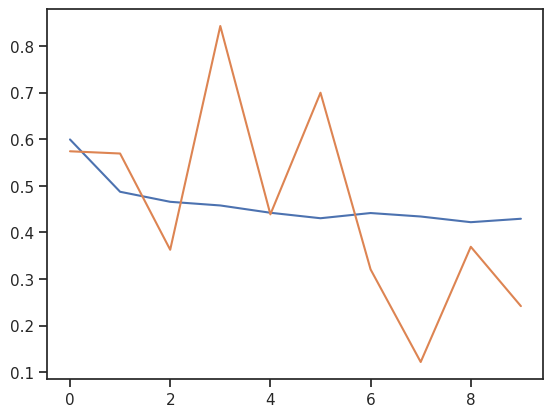

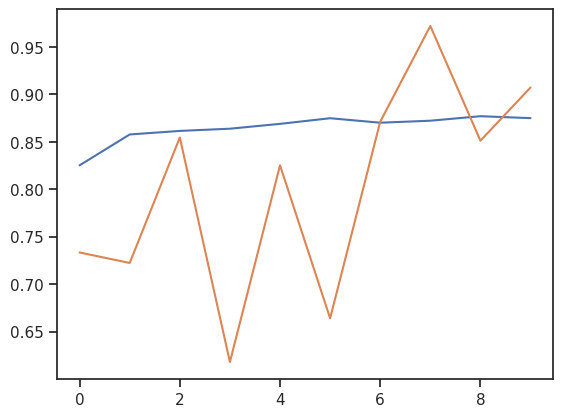

In [85]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.show()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


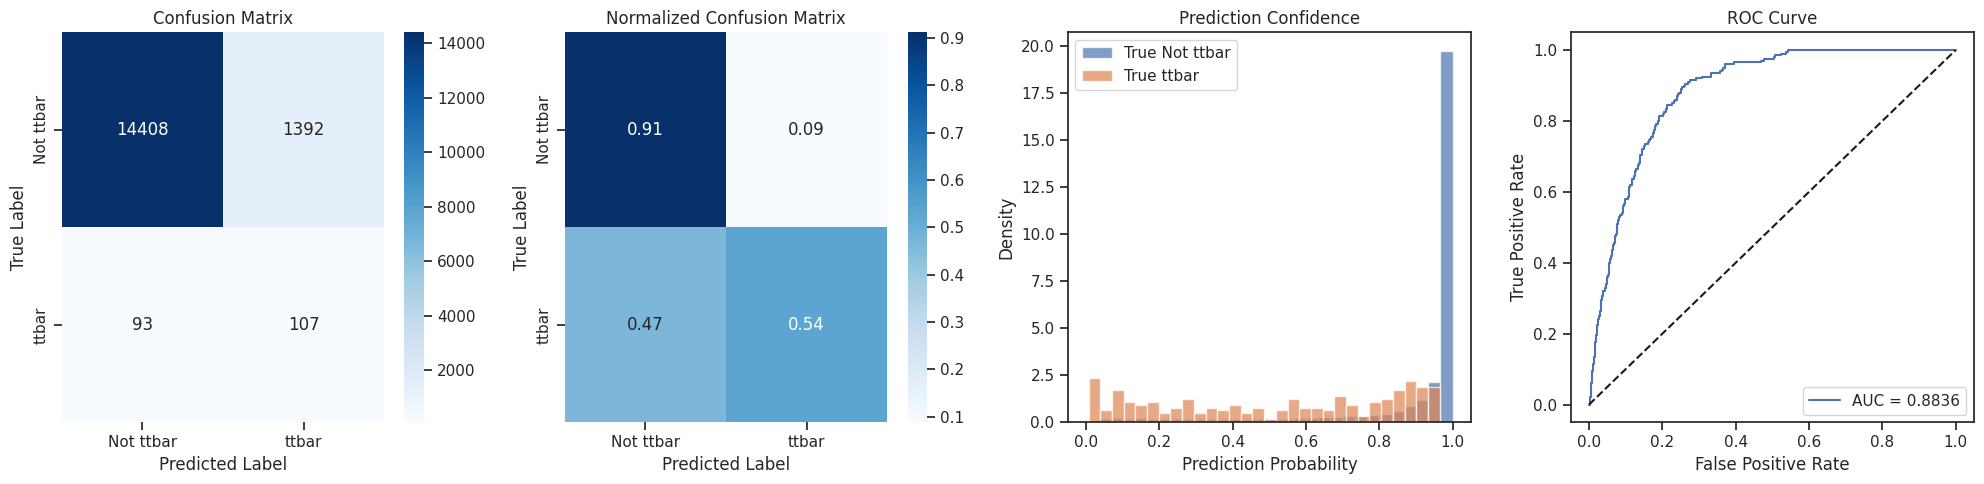

=== MODEL EVALUATION REPORT ===
Total samples: 16000
Classes: ['Not ttbar', 'ttbar']
Class distribution: [15800   200]

Classification Report:
              precision    recall  f1-score   support

   Not ttbar       0.99      0.91      0.95     15800
       ttbar       0.07      0.54      0.13       200

    accuracy                           0.91     16000
   macro avg       0.53      0.72      0.54     16000
weighted avg       0.98      0.91      0.94     16000


Detailed Metrics:
True Negatives: 14408
False Positives: 1392
False Negatives: 93
True Positives: 107
Precision: 0.0714
Recall: 0.5350
Specificity: 0.9119
F1-Score: 0.1260


In [86]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

def comprehensive_model_evaluation(model, X_test, y_test, class_names=None):
    """
    Complete evaluation with confusion matrix, metrics, and visualizations
    """
    # Predictions
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    if class_names is None:
        class_names = [f'Class {i}' for i in range(len(np.unique(y_test)))]
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create comprehensive plot
    fig = plt.figure(figsize=(20, 5))
    
    # 1. Confusion Matrix
    plt.subplot(1, 4, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # 2. Normalized Confusion Matrix
    plt.subplot(1, 4, 2)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Normalized Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # 3. Prediction Confidence Distribution
    plt.subplot(1, 4, 3)
    for i in range(len(class_names)):
        mask = y_test == i
        if np.sum(mask) > 0:
            plt.hist(y_pred_proba[mask, i], bins=30, alpha=0.7, 
                    label=f'True {class_names[i]}', density=True)
    plt.xlabel('Prediction Probability')
    plt.ylabel('Density')
    plt.title('Prediction Confidence')
    plt.legend()
    
    # 4. ROC Curve (for binary classification)
    if len(class_names) == 2:
        plt.subplot(1, 4, 4)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed report
    print("=== MODEL EVALUATION REPORT ===")
    print(f"Total samples: {len(y_test)}")
    print(f"Classes: {class_names}")
    print(f"Class distribution: {np.bincount(y_test)}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Detailed confusion matrix breakdown
    if len(class_names) == 2:
        tn, fp, fn, tp = cm.ravel()
        print(f"\nDetailed Metrics:")
        print(f"True Negatives: {tn}")
        print(f"False Positives: {fp}")
        print(f"False Negatives: {fn}")
        print(f"True Positives: {tp}")
        print(f"Precision: {tp/(tp+fp):.4f}")
        print(f"Recall: {tp/(tp+fn):.4f}")
        print(f"Specificity: {tn/(tn+fp):.4f}")
        print(f"F1-Score: {2*tp/(2*tp+fp+fn):.4f}")
    
    return cm, y_pred, y_pred_proba

# Use the comprehensive evaluation
cm, predictions, probabilities = comprehensive_model_evaluation(
    model, X_test_array, y_test_array, 
    class_names=['Not ttbar', 'ttbar']
)